## Generating a stacked bar chart where every row is a sample, showing the proportion of cells in each DC subset, also coloured by cancer type/ site
* open obect in python and export dataframe with necessary info
* then using R for plotting as this will work better for visualising

In [ ]:
#load packages I need
import os
import tools
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#show current directory 
os.chdir('/scratch/user/s4436039/scdata/Python_Integration_Sep')
os.getcwd()

'/scratch/user/s4436039/scdata/Python_Integration_Sep'

In [ ]:
sc.logging.print_header()

scanpy==1.10.2 anndata==0.10.8 umap==0.5.6 numpy==1.26.4 scipy==1.14.0 pandas==2.2.2 scikit-learn==1.5.0 statsmodels==0.14.2 igraph==0.11.5 pynndescent==0.5.12


In [ ]:
# read in data
data = sc.read_h5ad('NRclean_clustered2_DC.h5ad')

## Create dataframe per sample type, containing integration id, proportion of each DC subset, and cancer type

In [ ]:
#make an object for each sample type
data_P = data[data.obs["sample_type_major2"] == "primary tumour"]
data_M = data[data.obs["sample_type_major2"] == "metastatic tumour"]
data_H = data[data.obs["sample_type_major2"] == "healthy"]
data_A = data[data.obs["sample_type_major2"] == "ascites"]

### Primary:

In [ ]:
# Create a DataFrame containing just sample, cancer type and annotations 
df = data_P.obs[["integration_id", "cancer_broadest", "NR_annotations_simple"]].copy()

# Create a new column for each DC type, indicating whether each cell belongs to that type (True vs False)
df["is_cDC1"] = df["NR_annotations_simple"] == "cDC1"
df["is_cDC2"] = df["NR_annotations_simple"] == "cDC2"
df["is_mregDC"] = df["NR_annotations_simple"] == "mregDC"

# Calculate proportions of each DC type per sample within each cancer subtype
proportion_df = (
    df.groupby(["integration_id", "cancer_broadest"])[["is_cDC1", "is_cDC2", "is_mregDC"]] #groups dataframe by each unique combo of sample_id and cancer type, keeps the booleen columns 
    .mean() #calculating the mean of a booleen column gives the proportion of true values 
    .reset_index()
    .rename(columns={"is_cDC1": "cDC1_proportion", "is_cDC2": "cDC2_proportion", "is_mregDC": "mregDC_proportion"}) #rename eg. is_cDC1 column to cDC1_proportion
)

#delete rows with NaN values
proportion_df = proportion_df.dropna(subset=["cDC1_proportion"])

proportion_df.head(15)
proportion_df.to_csv("dc_plot_proportions_primary.csv", index=False)

/scratch/temp/14062515/ipykernel_1841256/719394209.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["integration_id", "cancer_broadest"])[["is_cDC1", "is_cDC2", "is_mregDC"]] #groups dataframe by each unique combo of sample_id and cancer type, keeps the booleen columns


### Mets:

In [ ]:
# Create a DataFrame containing just sample, cancer type and annotations 
df = data_M.obs[["integration_id", "cancer_broadest", "NR_annotations_simple"]].copy()

# Create a new column for each DC type, indicating whether each cell belongs to that type (True vs False)
df["is_cDC1"] = df["NR_annotations_simple"] == "cDC1"
df["is_cDC2"] = df["NR_annotations_simple"] == "cDC2"
df["is_mregDC"] = df["NR_annotations_simple"] == "mregDC"

# Calculate proportions of each DC type per sample within each cancer subtype
proportion_df = (
    df.groupby(["integration_id", "cancer_broadest"])[["is_cDC1", "is_cDC2", "is_mregDC"]] #groups dataframe by each unique combo of sample_id and cancer type, keeps the booleen columns 
    .mean() #calculating the mean of a booleen column gives the proportion of true values 
    .reset_index()
    .rename(columns={"is_cDC1": "cDC1_proportion", "is_cDC2": "cDC2_proportion", "is_mregDC": "mregDC_proportion"}) #rename eg. is_cDC1 column to cDC1_proportion
)

#delete rows with NaN values
proportion_df = proportion_df.dropna(subset=["cDC1_proportion"])

proportion_df.head(15)
proportion_df.to_csv("dc_plot_proportions_mets.csv", index=False)

/scratch/temp/14062515/ipykernel_1841256/640742762.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["integration_id", "cancer_broadest"])[["is_cDC1", "is_cDC2", "is_mregDC"]] #groups dataframe by each unique combo of sample_id and cancer type, keeps the booleen columns


### Healthy:

In [ ]:
# Create a DataFrame containing just sample, cancer type and annotations 
df = data_H.obs[["integration_id", "site", "NR_annotations_simple"]].copy()

# Create a new column for each DC type, indicating whether each cell belongs to that type (True vs False)
df["is_cDC1"] = df["NR_annotations_simple"] == "cDC1"
df["is_cDC2"] = df["NR_annotations_simple"] == "cDC2"
df["is_mregDC"] = df["NR_annotations_simple"] == "mregDC"

# Calculate proportions of each DC type per sample within each cancer subtype
proportion_df = (
    df.groupby(["integration_id", "site"])[["is_cDC1", "is_cDC2", "is_mregDC"]] #groups dataframe by each unique combo of sample_id and cancer type, keeps the booleen columns 
    .mean() #calculating the mean of a booleen column gives the proportion of true values 
    .reset_index()
    .rename(columns={"is_cDC1": "cDC1_proportion", "is_cDC2": "cDC2_proportion", "is_mregDC": "mregDC_proportion"}) #rename eg. is_cDC1 column to cDC1_proportion
)

#delete rows with NaN values
proportion_df = proportion_df.dropna(subset=["cDC1_proportion"])

proportion_df.head(15)
proportion_df.to_csv("dc_plot_proportions_healthy.csv", index=False)

/scratch/temp/14064831/ipykernel_2001939/2022132678.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["integration_id", "site"])[["is_cDC1", "is_cDC2", "is_mregDC"]] #groups dataframe by each unique combo of sample_id and cancer type, keeps the booleen columns


### Ascites:

In [ ]:
# Create a DataFrame containing just sample, cancer type and annotations 
df = data_A.obs[["integration_id", "cancer_broadest", "NR_annotations_simple"]].copy()

# Create a new column for each DC type, indicating whether each cell belongs to that type (True vs False)
df["is_cDC1"] = df["NR_annotations_simple"] == "cDC1"
df["is_cDC2"] = df["NR_annotations_simple"] == "cDC2"
df["is_mregDC"] = df["NR_annotations_simple"] == "mregDC"

# Calculate proportions of each DC type per sample within each cancer subtype
proportion_df = (
    df.groupby(["integration_id", "cancer_broadest"])[["is_cDC1", "is_cDC2", "is_mregDC"]] #groups dataframe by each unique combo of sample_id and cancer type, keeps the booleen columns 
    .mean() #calculating the mean of a booleen column gives the proportion of true values 
    .reset_index()
    .rename(columns={"is_cDC1": "cDC1_proportion", "is_cDC2": "cDC2_proportion", "is_mregDC": "mregDC_proportion"}) #rename eg. is_cDC1 column to cDC1_proportion
)

#delete rows with NaN values
proportion_df = proportion_df.dropna(subset=["cDC1_proportion"])

proportion_df.head(15)
proportion_df.to_csv("dc_plot_proportions_ascites.csv", index=False)

/scratch/temp/14064831/ipykernel_2007464/2217107767.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["integration_id", "cancer_broadest"])[["is_cDC1", "is_cDC2", "is_mregDC"]] #groups dataframe by each unique combo of sample_id and cancer type, keeps the booleen columns


# Next section in R: generating figure

In [1]:
# set directory
setwd('/scratch/user/s4436039/scdata/Python_Integration_Sep')

In [2]:
#load data
df_P <- read.csv("dc_plot_proportions_primary.csv", row.names =1)
df_M <- read.csv("dc_plot_proportions_mets.csv", row.names =1)
df_H <- read.csv("dc_plot_proportions_healthy.csv", row.names =1)
df_A <- read.csv("dc_plot_proportions_ascites.csv", row.names =1)

In [3]:
# change lymph node to LN for plotting
df_H$site[df_H$site == "lymph node"] <- "LN"

In [4]:
library(ggplot2)
library(ggh4x)
library(tidyr)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [5]:
# convert data to long format
df_P <- df_P %>%
  tibble::rownames_to_column("integration_id") %>%  
  pivot_longer(
    cols = c(cDC1_proportion, cDC2_proportion, mregDC_proportion),
    names_to = "DC_subset",
    values_to = "proportion"
  )

  df_M <- df_M %>%
  tibble::rownames_to_column("integration_id") %>%  
  pivot_longer(
    cols = c(cDC1_proportion, cDC2_proportion, mregDC_proportion),
    names_to = "DC_subset",
    values_to = "proportion"
  )

  df_H <- df_H %>%
  tibble::rownames_to_column("integration_id") %>%  
  pivot_longer(
    cols = c(cDC1_proportion, cDC2_proportion, mregDC_proportion),
    names_to = "DC_subset",
    values_to = "proportion"
  )

  df_A <- df_A %>%
  tibble::rownames_to_column("integration_id") %>%  
  pivot_longer(
    cols = c(cDC1_proportion, cDC2_proportion, mregDC_proportion),
    names_to = "DC_subset",
    values_to = "proportion"
  )

In [6]:
head(df_P)

integration_id,cancer_broadest,DC_subset,proportion
<chr>,<chr>,<chr>,<dbl>
GGSE223063_GLIO_1,GBM,cDC1_proportion,0.3717949
GGSE223063_GLIO_1,GBM,cDC2_proportion,0.4871795
GGSE223063_GLIO_1,GBM,mregDC_proportion,0.1410256
GGSE223063_GLIO_3,GBM,cDC1_proportion,0.5000000
GGSE223063_GLIO_3,GBM,cDC2_proportion,0.5000000
GGSE223063_GLIO_3,GBM,mregDC_proportion,0.0000000


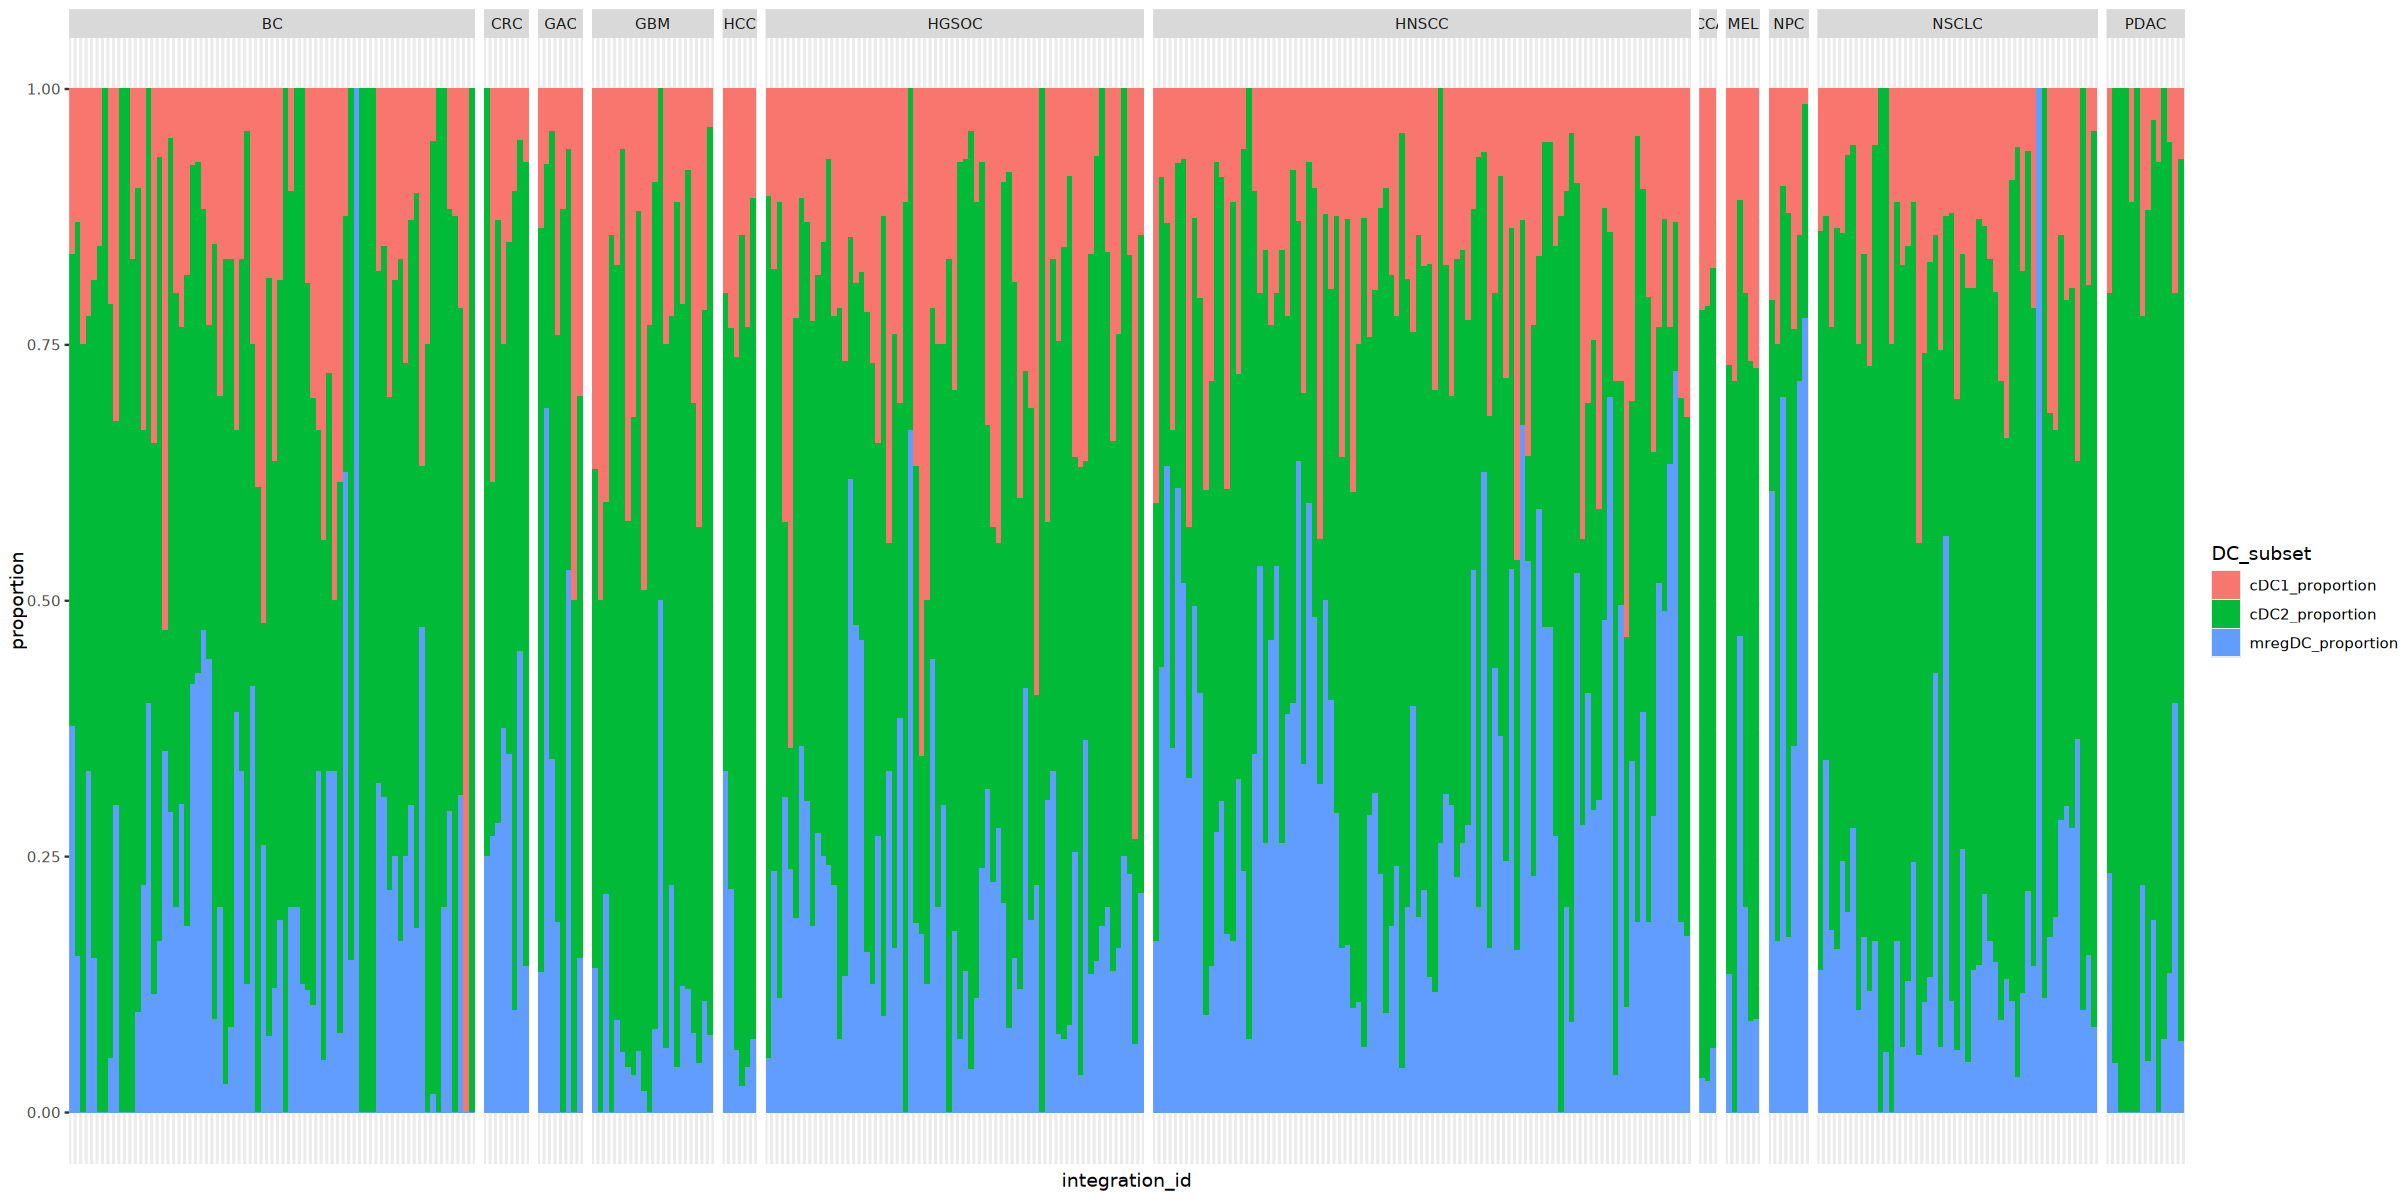

In [ ]:
options(repr.plot.height=10, repr.plot.width=20)
ggplot(df_P, aes(fill = DC_subset, y = proportion, x = integration_id)) + 
  geom_bar(position = "stack", stat = "identity") +
  facet_grid(~ cancer_broadest, scales = "free_x", space = "free") +
  theme(axis.text.x=element_blank(), axis.ticks.x=element_blank()) 

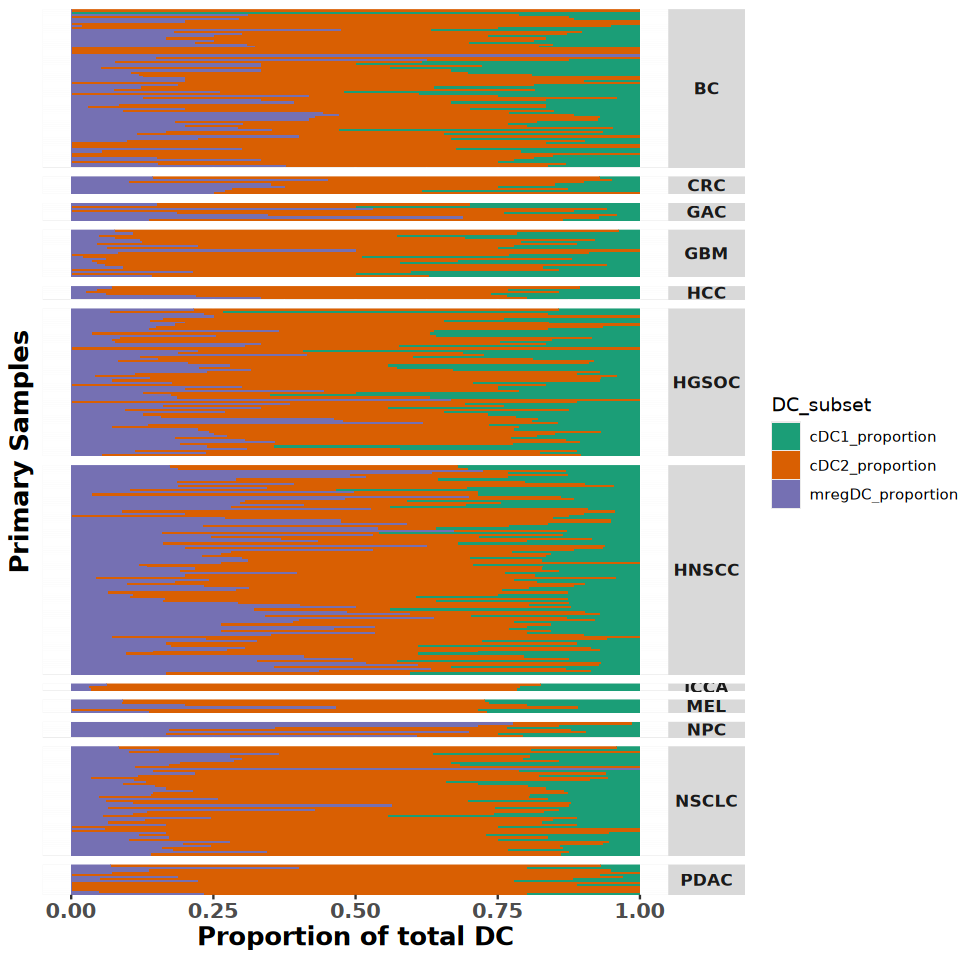

In [ ]:
# plot once to show legend
options(repr.plot.height=8, repr.plot.width=8)
ggplot(df_P, aes(fill = DC_subset, x = proportion, y = integration_id)) + 
  geom_bar(position = "stack", stat = "identity") +
  facet_grid(cancer_broadest ~ ., scales = "free_y", space = "free") +
  ylab("Primary Samples") +
  xlab("Proportion of total DC") +
  theme(axis.text.y = element_blank(), 
        axis.text.x = element_text(face="bold", size = 12),
        axis.title.x = element_text(face="bold", size = 15),
        axis.title.y = element_text(face="bold", size = 15),
        axis.ticks.y = element_blank(),
        strip.text.y = element_text(angle = 0, face="bold", size = 10)) +
  scale_fill_brewer(palette="Dark2")

ggsave("dc_proportions_legend.svg", width = 8, height = 8, units = "in")

## Updating colours to match other manuscript figures:
* Colours are: 
* #d62728 - cMono
* #279e68 - Mac
* #e377c2 - cDC1
* #aa40fc - cDC2
* #8c564b - mregDC
* #5fa6e6 - ncMono

"cDC1_proportion" = "#e377c2","cDC2_proportion" = "#aa40fc","mregDC_proportion" = "#8c564b"

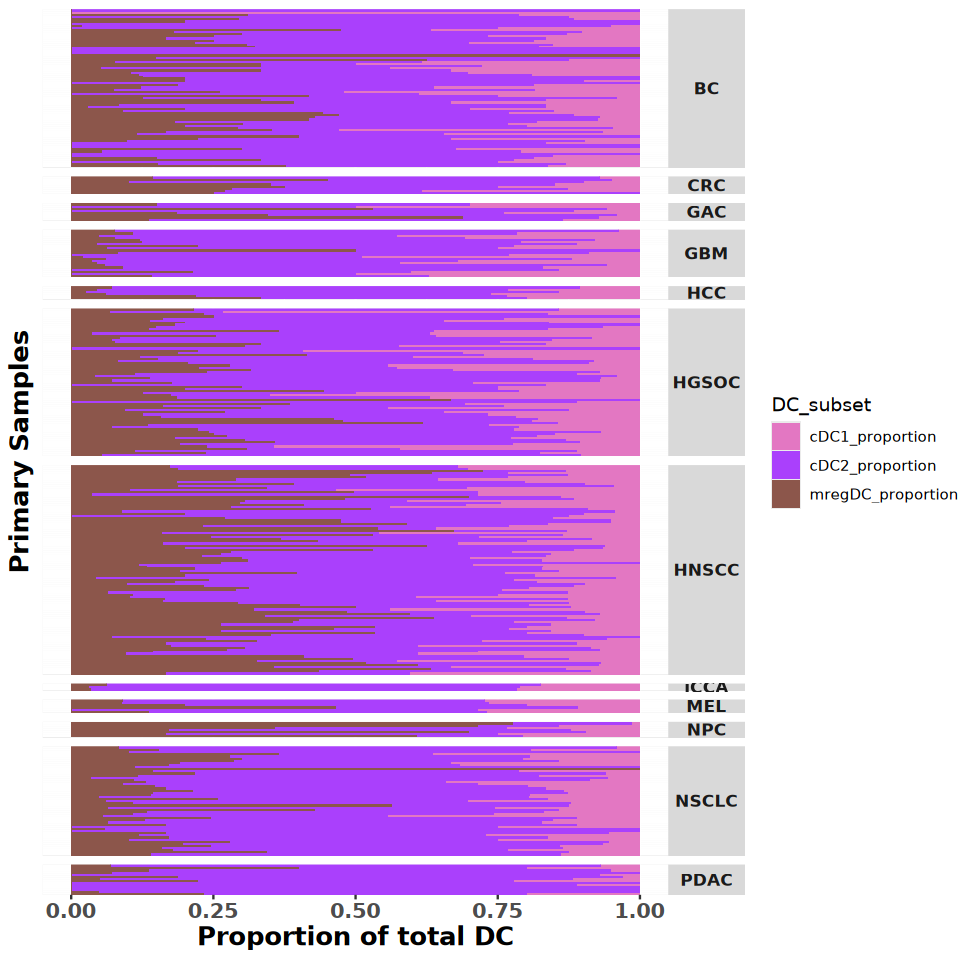

In [7]:
# plot once to show legend
options(repr.plot.height=8, repr.plot.width=8)
ggplot(df_P, aes(fill = DC_subset, x = proportion, y = integration_id)) + 
  geom_bar(position = "stack", stat = "identity") +
  facet_grid(cancer_broadest ~ ., scales = "free_y", space = "free") +
  ylab("Primary Samples") +
  xlab("Proportion of total DC") +
  theme(axis.text.y = element_blank(), 
        axis.text.x = element_text(face="bold", size = 12),
        axis.title.x = element_text(face="bold", size = 15),
        axis.title.y = element_text(face="bold", size = 15),
        axis.ticks.y = element_blank(),
        strip.text.y = element_text(angle = 0, face="bold", size = 10)) +
  scale_fill_manual(values = c("cDC1_proportion" = "#e377c2","cDC2_proportion" = "#aa40fc","mregDC_proportion" = "#8c564b"))

ggsave("dc_proportions_legend_2.pdf", width = 8, height = 8, units = "in")

In [8]:
library(svglite)

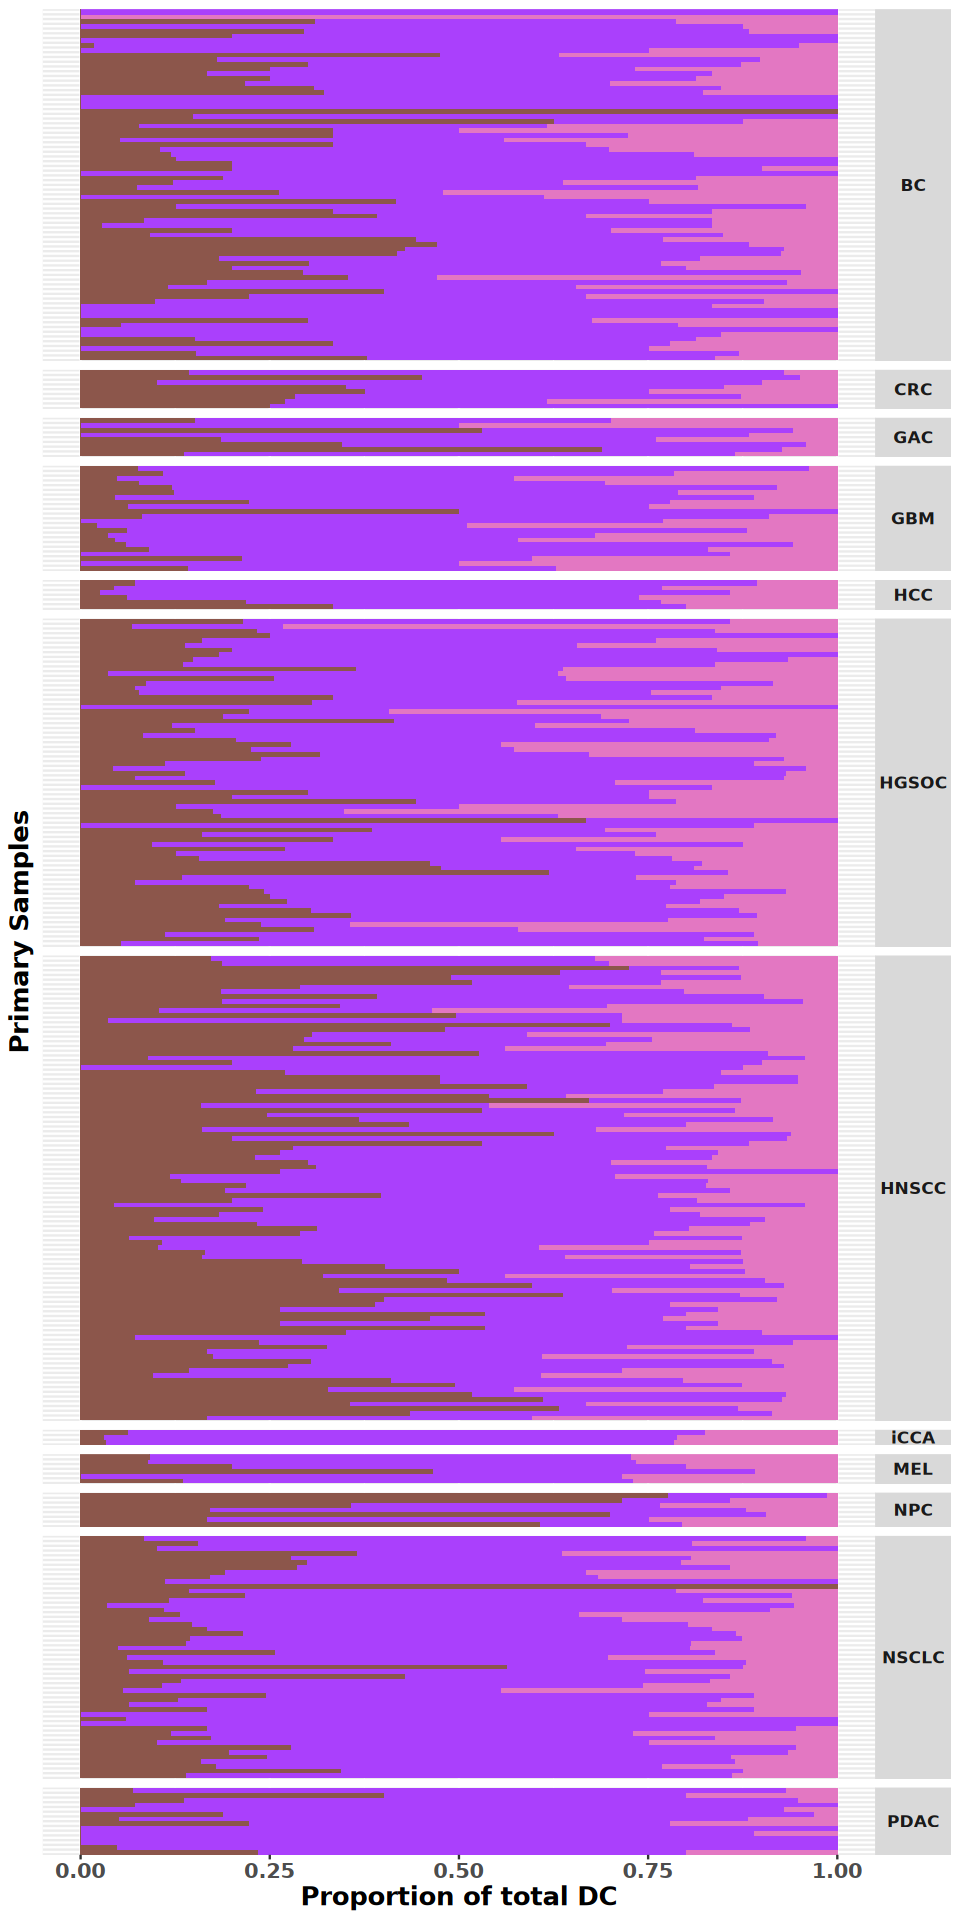

In [9]:
options(repr.plot.height=16, repr.plot.width=8)
ggplot(df_P, aes(fill = DC_subset, x = proportion, y = integration_id)) + 
  geom_bar(position = "stack", stat = "identity") +
  facet_grid(cancer_broadest ~ ., scales = "free_y", space = "free") +
  ylab("Primary Samples") +
  xlab("Proportion of total DC") +
  theme(axis.text.y = element_blank(), 
        axis.text.x = element_text(face="bold", size = 12),
        axis.title.x = element_text(face="bold", size = 15),
        axis.title.y = element_text(face="bold", size = 15),
        axis.ticks.y = element_blank(),
        strip.text.y = element_text(angle = 0, face="bold", size = 10),
        legend.position = "none") +
  scale_fill_manual(values = c("cDC1_proportion" = "#e377c2","cDC2_proportion" = "#aa40fc","mregDC_proportion" = "#8c564b"))

  ggsave("dc_proportions_primary_2.pdf", width = 8, height = 16, units = "in")

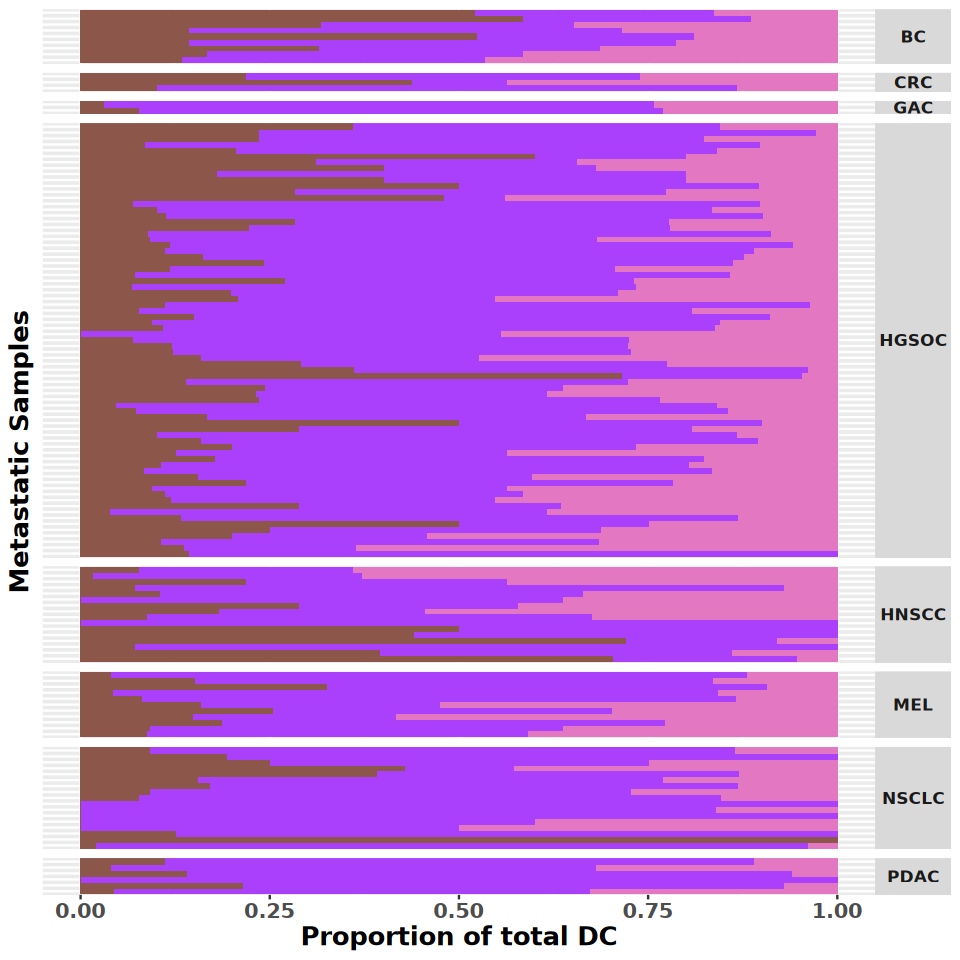

In [10]:
options(repr.plot.height=8, repr.plot.width=8)
ggplot(df_M, aes(fill = DC_subset, x = proportion, y = integration_id)) + 
  geom_bar(position = "stack", stat = "identity") +
  facet_grid(cancer_broadest ~ ., scales = "free_y", space = "free") +
  ylab("Metastatic Samples") +
  xlab("Proportion of total DC") +
  theme(axis.text.y = element_blank(), 
        axis.text.x = element_text(face="bold", size = 12),
        axis.title.x = element_text(face="bold", size = 15),
        axis.title.y = element_text(face="bold", size = 15),
        axis.ticks.y = element_blank(),
        strip.text.y = element_text(angle = 0, face="bold", size = 10),
        legend.position = "none") +
  scale_fill_manual(values = c("cDC1_proportion" = "#e377c2","cDC2_proportion" = "#aa40fc","mregDC_proportion" = "#8c564b"))

ggsave("dc_proportions_mets_v2.pdf", width = 8, height = 8, units = "in")

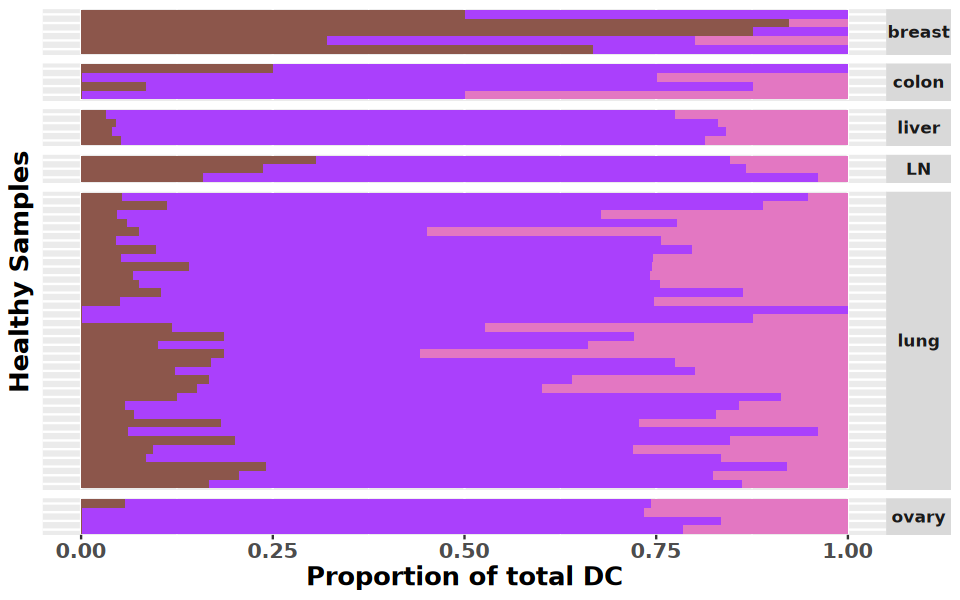

In [11]:
options(repr.plot.height=5, repr.plot.width=8)
ggplot(df_H, aes(fill = DC_subset, x = proportion, y = integration_id)) + 
  geom_bar(position = "stack", stat = "identity") +
  facet_grid(site ~ ., scales = "free_y", space = "free") +
  ylab("Healthy Samples") +
  xlab("Proportion of total DC") +
  theme(axis.text.y = element_blank(), 
        axis.text.x = element_text(face="bold", size = 12),
        axis.title.x = element_text(face="bold", size = 15),
        axis.title.y = element_text(face="bold", size = 15),
        axis.ticks.y = element_blank(),
        strip.text.y = element_text(angle = 0, face="bold", size = 10),
        legend.position = "none") +
  scale_fill_manual(values = c("cDC1_proportion" = "#e377c2","cDC2_proportion" = "#aa40fc","mregDC_proportion" = "#8c564b"))

ggsave("dc_proportions_healthy_v2.pdf", width = 8, height = 5, units = "in")

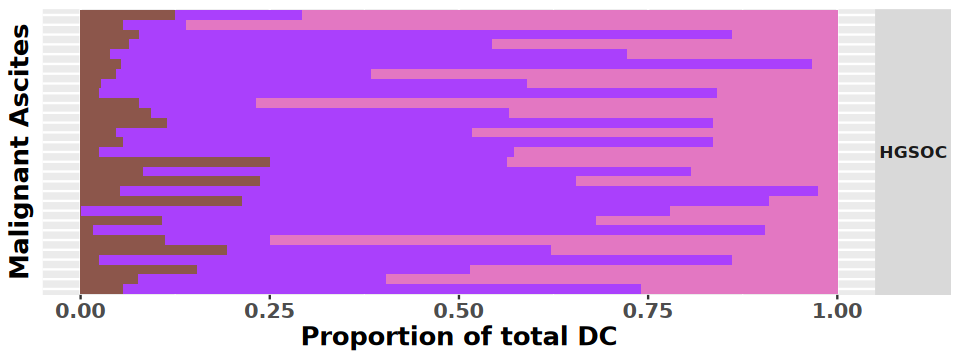

In [12]:
options(repr.plot.height=3, repr.plot.width=8)
ggplot(df_A, aes(fill = DC_subset, x = proportion, y = integration_id)) + 
  geom_bar(position = "stack", stat = "identity") +
  facet_grid(cancer_broadest ~ ., scales = "free_y", space = "free") +
  ylab("Malignant Ascites") +
  xlab("Proportion of total DC") +
  theme(axis.text.y = element_blank(), 
        axis.text.x = element_text(face="bold", size = 12),
        axis.title.x = element_text(face="bold", size = 15),
        axis.title.y = element_text(face="bold", size = 15),
        axis.ticks.y = element_blank(),
        strip.text.y = element_text(angle = 0, face="bold", size = 10),
        legend.position = "none") +
  scale_fill_manual(values = c("cDC1_proportion" = "#e377c2","cDC2_proportion" = "#aa40fc","mregDC_proportion" = "#8c564b"))

ggsave("dc_proportions_ascites_v2.pdf", width = 8, height = 3, units = "in")